In [1]:
import numba
import sys
sys.path.insert(0, '../../python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math
import solvers

In [2]:
%matplotlib inline

In [5]:
Degree = 3 # degree
Height = 3 # Height of the tree

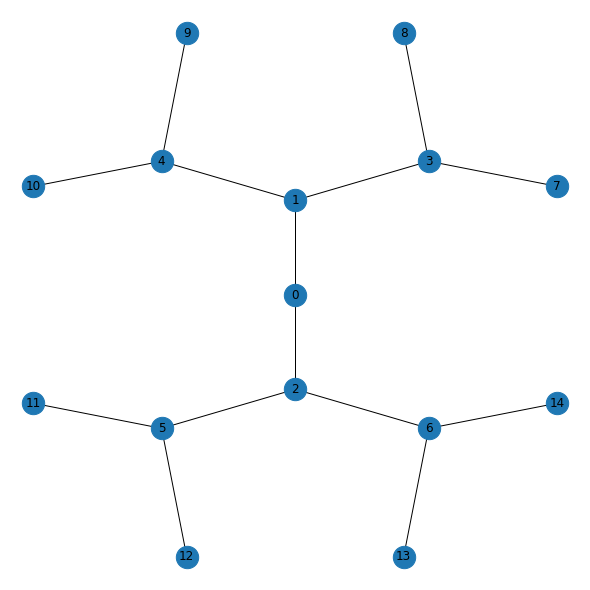

[[14, 10], [6, 7], [13, 8], [9, 2]]


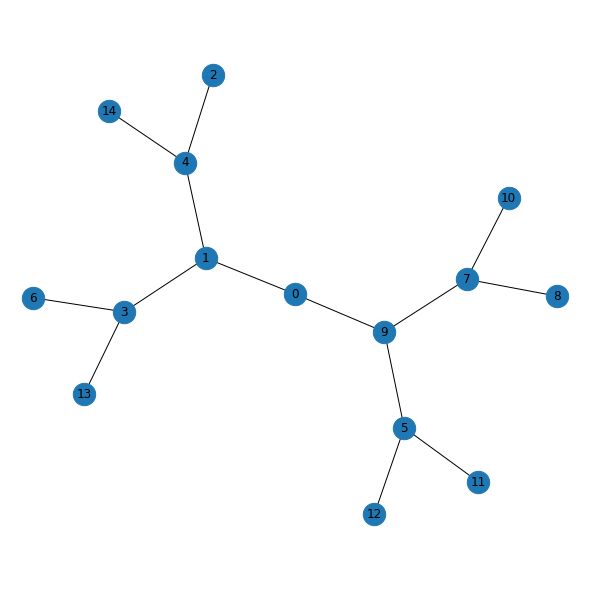

In [6]:
import imp 

import graph_gen
imp.reload(graph_gen)
N, J_interaction = graph_gen.tree_interaction(Degree,Height)

#H = np.random.random(N)
H = np.zeros(N)

num_swap = 4
swaps = []
nodes = list(range(N))
for n in range(num_swap):
    ss_temp = random.sample(nodes, 2)
    swaps.append(ss_temp)
    #print(ss_temp)
    nodes.remove(ss_temp[0])
    nodes.remove(ss_temp[1])
    
print(swaps)

J_interaction_rand = J_interaction.copy()
H_rand = H.copy()

for w in swaps:
    rev = list(reversed(w))
    J_interaction_rand[w] = J_interaction_rand[rev] 
    J_interaction_rand[:,w] = J_interaction_rand[:,rev] 
    H_rand[w] = H_rand[rev]
J_interaction_rand
graph_gen.plot_matrix_graph(J_interaction_rand)

betas = np.arange(1e-6,2,1e-2)
betas_fast = np.arange(1e-6,2,1e-1)

j_start = 1
j = graph_gen.fixed_value(j_start)
J = graph_gen.set_J(J_interaction, j)
J_rand = graph_gen.set_J(J_interaction_rand, j)

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

In [7]:
tree = model.model(N, H, J, J_interaction)
tree_rand = model.model(N, H_rand, J_rand, J_interaction_rand)

In [8]:
from save_data import save_pickle_zip
save_pickle_zip("./models/tree.pkl", tree)
save_pickle_zip("./models/tree_rand.pkl", tree_rand)

In [9]:
import solvers
imp.reload(solvers)
res_ex = solvers.exact_sol(tree, betas_fast)

beta: 0.0, Fe: -693147.181 Energy: -9.33e-07 M: 0.0 S: 0.693
beta: 0.1, Fe: -6.978 Energy: -0.093 M: 0.0 S: 0.689.04e+022
beta: 0.2, Fe: -3.558 Energy: -0.184 M: 0.0 S: 0.6753.16
beta: 0.3, Fe: -2.448 Energy: -0.272 M: 0.0 S: 0.6536.51
beta: 0.4, Fe: -1.915 Energy: -0.355 M: 0.0 S: 0.6248.51
beta: 0.5, Fe: -1.611 Energy: -0.431 M: 0.0 S: 0.5923.96
beta: 0.6, Fe: -1.420 Energy: -0.501 M: 0.0 S: 0.5511.08
beta: 0.7, Fe: -1.293 Energy: -0.564 M: 0.0 S: 0.5119.19
beta: 0.8, Fe: -1.206 Energy: -0.62 M: 7.28e-17 S: 0.469
beta: 0.9, Fe: -1.143 Energy: -0.669 M: 3.07e-18 S: 0.427
beta: 1.0, Fe: -1.098 Energy: -0.711 M: 2.18e-18 S: 0.387
beta: 1.1, Fe: -1.065 Energy: -0.747 M: 4.8e-16 S: 0.349
beta: 1.2, Fe: -1.039 Energy: -0.778 M: 8.11e-15 S: 0.314
beta: 1.3, Fe: -1.020 Energy: -0.804 M: 3.28e-15 S: 0.281
beta: 1.4, Fe: -1.006 Energy: -0.826 M: 1.45e-15 S: 0.251
beta: 1.5, Fe: -0.994 Energy: -0.845 M: 9.16e-18 S: 0.224
beta: 1.6, Fe: -0.986 Energy: -0.86 M: 0.0 S: 0.2 -14.44
beta: 1.7, Fe: -0

In [10]:
res_ex_rand = solvers.exact_sol(tree_rand, betas_fast)

beta: 0.0, Fe: -693147.181 Energy: -9.33e-07 M: 0.0 S: 0.693
beta: 0.1, Fe: -6.978 Energy: -0.093 M: 0.0 S: 0.6891.04e+02
beta: 0.2, Fe: -3.558 Energy: -0.184 M: 0.0 S: 0.6753.19
beta: 0.3, Fe: -2.448 Energy: -0.272 M: 0.0 S: 0.65336.5
beta: 0.4, Fe: -1.915 Energy: -0.355 M: 0.0 S: 0.6248.54
beta: 0.5, Fe: -1.611 Energy: -0.431 M: 0.0 S: 0.59-23.9
beta: 0.6, Fe: -1.420 Energy: -0.501 M: 0.0 S: 0.55121.0
beta: 0.7, Fe: -1.293 Energy: -0.564 M: 8.6e-18 S: 0.511
beta: 0.8, Fe: -1.206 Energy: -0.62 M: 6.16e-17 S: 0.469
beta: 0.9, Fe: -1.143 Energy: -0.669 M: 6.15e-18 S: 0.427
beta: 1.0, Fe: -1.098 Energy: -0.711 M: 4.37e-18 S: 0.387
beta: 1.1, Fe: -1.065 Energy: -0.747 M: 5.67e-16 S: 0.349
beta: 1.2, Fe: -1.039 Energy: -0.778 M: 5.78e-15 S: 0.314
beta: 1.3, Fe: -1.020 Energy: -0.804 M: 5.04e-16 S: 0.281
beta: 1.4, Fe: -1.006 Energy: -0.826 M: 4.12e-16 S: 0.251
beta: 1.5, Fe: -0.994 Energy: -0.845 M: 6.1e-18 S: 0.224
beta: 1.6, Fe: -0.986 Energy: -0.86 M: 3.4e-18 S: 0.24.4
beta: 1.7, Fe: -0

In [11]:
from save_data import save_pickle_zip
save_pickle_zip("./solutions/tree.pkl", res_ex)
save_pickle_zip("./solutions/tree_rand.pkl", res_ex_rand)

# Rand h field

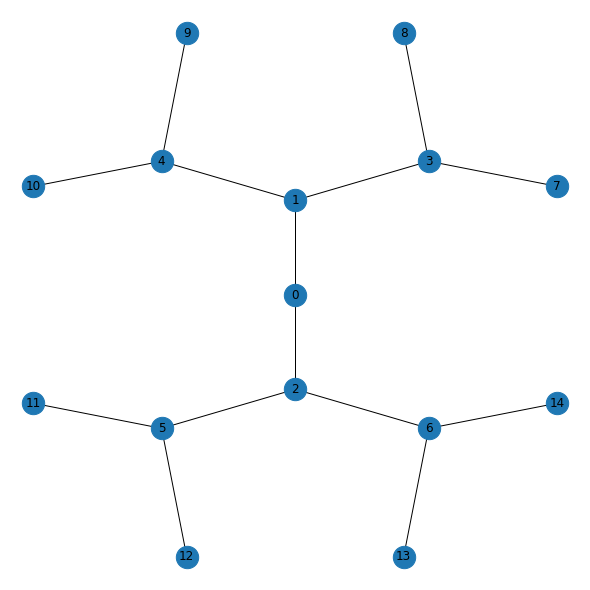

[[12, 0], [4, 14], [13, 8], [2, 1]]


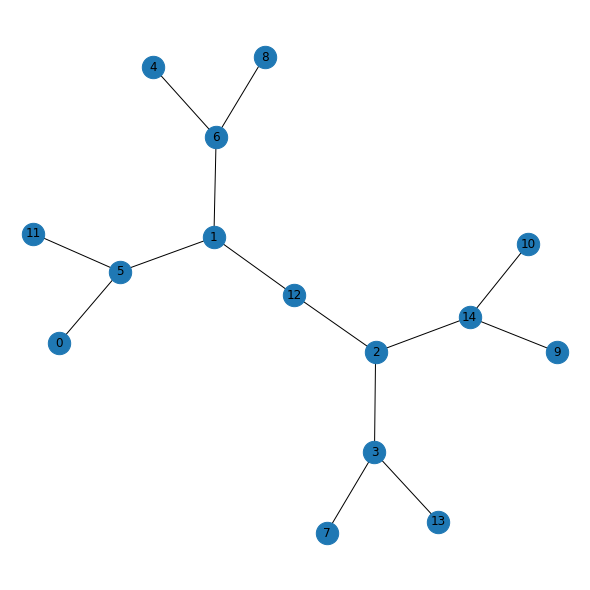

In [14]:
import imp 

import graph_gen
imp.reload(graph_gen)
N, J_interaction = graph_gen.tree_interaction(Degree,Height)

h_ = 3
H = h_ * (2 * np.random.random(N) - 1)
#H = np.zeros(N)

num_swap = 4
swaps = []
nodes = list(range(N))
for n in range(num_swap):
    ss_temp = random.sample(nodes, 2)
    swaps.append(ss_temp)
    #print(ss_temp)
    nodes.remove(ss_temp[0])
    nodes.remove(ss_temp[1])
    
print(swaps)

J_interaction_rand = J_interaction.copy()
H_rand = H.copy()

for w in swaps:
    rev = list(reversed(w))
    J_interaction_rand[w] = J_interaction_rand[rev] 
    J_interaction_rand[:,w] = J_interaction_rand[:,rev] 
    H_rand[w] = H_rand[rev]
J_interaction_rand
graph_gen.plot_matrix_graph(J_interaction_rand)

betas = np.arange(1e-6,2,1e-2)
betas_fast = np.arange(1e-6,2,1e-1)

j_start = 1
j = graph_gen.fixed_value(j_start)
J = graph_gen.set_J(J_interaction, j)
J_rand = graph_gen.set_J(J_interaction_rand, j)

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

In [16]:
tree = model.model(N, H, J, J_interaction)
tree_rand = model.model(N, H_rand, J_rand, J_interaction_rand)

In [17]:
from save_data import save_pickle_zip
save_pickle_zip("./models/tree_rf.pkl", tree)
save_pickle_zip("./models/tree_rand_rf.pkl", tree_rand)

In [18]:
import solvers
imp.reload(solvers)
res_ex = solvers.exact_sol(tree, betas_fast)

beta: 0.0, Fe: -693147.181 Energy: -3.93e-06 M: 1.59e-06 S: 0.693
beta: 0.1, Fe: -7.116 Energy: -0.357 M: 0.147 S: 0.6766e+0222
beta: 0.2, Fe: -3.810 Energy: -0.639 M: 0.266 S: 0.634.050
beta: 0.3, Fe: -2.791 Energy: -0.856 M: 0.366 S: 0.581.712
beta: 0.4, Fe: -2.328 Energy: -1.02 M: 0.458 S: 0.5234.849
beta: 0.5, Fe: -2.080 Energy: -1.15 M: 0.542 S: 0.4671.195
beta: 0.6, Fe: -1.933 Energy: -1.24 M: 0.614 S: 0.4138.975
beta: 0.7, Fe: -1.840 Energy: -1.32 M: 0.675 S: 0.3637.643
beta: 0.8, Fe: -1.779 Energy: -1.38 M: 0.726 S: 0.3196.664
beta: 0.9, Fe: -1.738 Energy: -1.43 M: 0.767 S: 0.2826.099
beta: 1.0, Fe: -1.708 Energy: -1.46 M: 0.8 S: 0.24725.6655
beta: 1.1, Fe: -1.687 Energy: -1.49 M: 0.828 S: 0.218.3322
beta: 1.2, Fe: -1.671 Energy: -1.51 M: 0.85 S: 0.19425.100
beta: 1.3, Fe: -1.660 Energy: -1.53 M: 0.868 S: 0.1734.998
beta: 1.4, Fe: -1.651 Energy: -1.54 M: 0.883 S: 0.1564.777
beta: 1.5, Fe: -1.644 Energy: -1.55 M: 0.895 S: 0.1424.666
beta: 1.6, Fe: -1.638 Energy: -1.56 M: 0.906 S

In [19]:
res_ex_rand = solvers.exact_sol(tree_rand, betas_fast)

beta: 0.0, Fe: -693147.181 Energy: -3.93e-06 M: 1.59e-06 S: 0.693
beta: 0.1, Fe: -7.116 Energy: -0.357 M: 0.147 S: 0.67606e+0222
beta: 0.2, Fe: -3.810 Energy: -0.639 M: 0.266 S: 0.634.072
beta: 0.3, Fe: -2.791 Energy: -0.856 M: 0.366 S: 0.581.73
beta: 0.4, Fe: -2.328 Energy: -1.02 M: 0.458 S: 0.5234.886
beta: 0.5, Fe: -2.080 Energy: -1.15 M: 0.542 S: 0.4671.119
beta: 0.6, Fe: -1.933 Energy: -1.24 M: 0.614 S: 0.4138.997
beta: 0.7, Fe: -1.840 Energy: -1.32 M: 0.675 S: 0.3637.543
beta: 0.8, Fe: -1.779 Energy: -1.38 M: 0.726 S: 0.3196.6.4
beta: 0.9, Fe: -1.738 Energy: -1.43 M: 0.767 S: 0.2826.087
beta: 1.0, Fe: -1.708 Energy: -1.46 M: 0.8 S: 0.247-25.633
beta: 1.1, Fe: -1.687 Energy: -1.49 M: 0.828 S: 0.2185.3.0
beta: 1.2, Fe: -1.671 Energy: -1.51 M: 0.85 S: 0.19425.07
beta: 1.3, Fe: -1.660 Energy: -1.53 M: 0.868 S: 0.1734.965
beta: 1.4, Fe: -1.651 Energy: -1.54 M: 0.883 S: 0.1564.744
beta: 1.5, Fe: -1.644 Energy: -1.55 M: 0.895 S: 0.1424.633
beta: 1.6, Fe: -1.638 Energy: -1.56 M: 0.906 S:

In [20]:
from save_data import save_pickle_zip
save_pickle_zip("./solutions/tree_rf.pkl", res_ex)
save_pickle_zip("./solutions/tree_rand_rf.pkl", res_ex_rand)